In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

In [4]:
G

/home/grace/Documents/python/misc/cuda/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


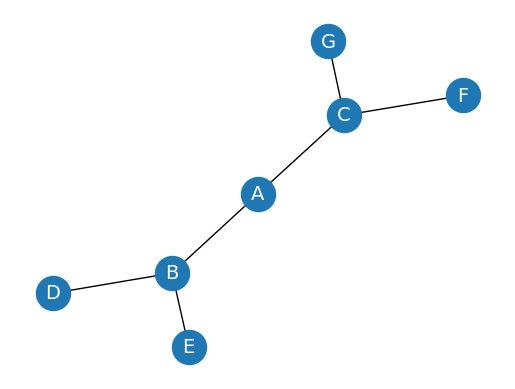

In [5]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )


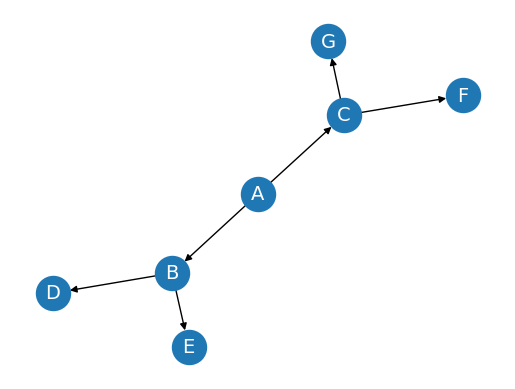

In [6]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

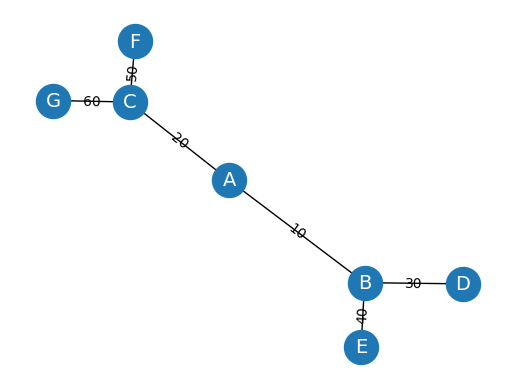

In [7]:
WG = nx.Graph()
WG.add_edges_from([('A', 'B', {'weight':10}), ('A', 'C',{'weight':20}), ('B', 'D',{'weight':30}), ('B', 'E',{'weight':40}), ('C', 'F',{'weight':50}), ('C', 'G',{'weight':60})])
labels = nx.get_edge_attributes(WG, 'weight')
plt.axis('off')
nx.draw_networkx_edge_labels(WG, pos=nx.spring_layout(WG, seed=0), edge_labels=labels)
nx.draw_networkx(WG,
                 pos=nx.spring_layout(WG, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [8]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 2 connected? True


In [9]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg(A) = {G.degree['A']}")

DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2


In [10]:
print(f"Degree centrality      = {nx.degree_centrality(G)}")
print(f"Closeness centrality   = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")


Degree centrality      = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality   = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [11]:
from gensim.models.word2vec import Word2Vec

In [12]:
from node2vec import Node2Vec

/home/grace/Documents/python/misc/cuda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from node2vec import Node2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import networkx as nx
from rdkit import Chem

In [14]:
# Define mol_to_nx function to convert molecules to NetworkX graphs
def mol_to_nx(mol):
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), label=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), label=bond.GetBondType())
    return G

In [15]:
# Custom Node2Vec embedding class
class Node2VecEmbedding(BaseEstimator, TransformerMixin):
    def __init__(self, dimensions=64, walk_length=30, num_walks=200, p=1, q=1):
        self.dimensions = dimensions
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.p = p
        self.q = q

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        embeddings = []
        for G in X:
            node2vec = Node2Vec(G, dimensions=self.dimensions, walk_length=self.walk_length, num_walks=self.num_walks, p=self.p, q=self.q, workers=4)
            model = node2vec.fit(window=10, min_count=1, batch_words=4)
            graph_embedding = np.mean([model.wv[str(node)] for node in G.nodes()], axis=0)
            embeddings.append(graph_embedding)
        return np.array(embeddings)

In [16]:
df = pd.read_csv('/home/grace/Documents/python/metgraph/data/processed/genetox_outcomes.csv')

In [17]:
mydict = {k:v for k,v in zip(df['DTXSID'], df['SMILES'])}

In [18]:
len(mydict)

5403

In [19]:
graph_dict = {}
errors = []
for k, v in mydict.items():
  try:
    a = mol_to_nx(Chem.MolFromSmiles(v))
  except Exception as error:
    errors.append(error)
  finally:
    graph_dict[k] = a

In [20]:
len(graph_dict)

5403

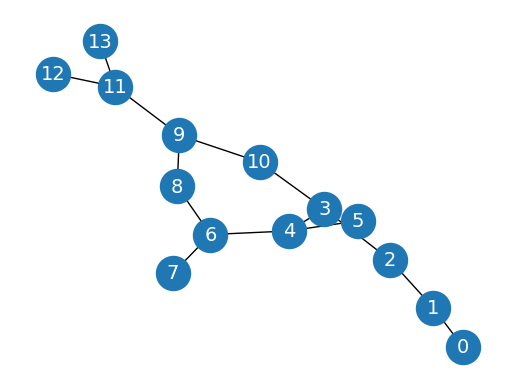

In [25]:
plt.figure()
plt.axis('off')
nx.draw_networkx(graph_dict['DTXSID00157169'],
                 pos=nx.spring_layout(graph_dict['DTXSID00157169'], seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [26]:
#graph_dict

In [27]:
node2vec_embedding = Node2VecEmbedding(dimensions=64, walk_length=30, num_walks=200, p=2, q=2)

In [28]:
embeddings = node2vec_embedding.fit_transform(graph_dict.values())

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 1721.12it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 955.40it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 434.87it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 465.50it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 331.05it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 2462.86it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 1325.11it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 820.40it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 448.87it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 1079.28it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 403.23it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 3656.31it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 1128.82

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
len(embeddings)

5403

In [33]:
combined_dict = {key: embeddings[value] for key, value in graph_dict.items()}

In [34]:
#combined_dict

In [35]:
len(combined_dict)

5403

In [36]:
df.head()

Unnamed: 0          DTXSID  outcome                                 SMILES
0           0  DTXSID00148597        1  ClCC1=C2C=CC3=CC=CC4=C3C2=C(C=C1)C=C4
1           1  DTXSID00157169        1    CCNC1=C(O)C(Cl)=CC(=C1)[N+]([O-])=O
2           2  DTXSID00159204        0                   CCO[Si](C)(CCCCl)OCC
3           3  DTXSID00160734        0           NCCCC(O)(P(O)(O)=O)P(O)(O)=O
4           4  DTXSID00162834        0                 CNCC1=CC=CC2=CC=CC=C12

In [37]:
graph_dict['DTXSID00148597']

In [38]:
df[df['DTXSID'].isin(['DTXSID0020529', 'DTXSID0020943'])]

Unnamed: 0         DTXSID  outcome  \
51          51  DTXSID0020529        1   
69          69  DTXSID0020943        1   

                                      SMILES  
51  CC1=C(C=C(C=C1)[N+]([O-])=O)[N+]([O-])=O  
69            COC1=C(N)C=C(C=C1)[N+]([O-])=O

In [40]:
df[df['DTXSID'].isin(['DTXSID0020151', 'DTXSID0021206'])]

Unnamed: 0         DTXSID  outcome               SMILES
29          29  DTXSID0020151        1  CC(=O)OCC1=CC=CC=C1
78          78  DTXSID0021206        1              CC(O)CO

In [45]:
embedding_df = pd.DataFrame(embeddings, index = graph_dict.keys())

In [47]:
from scipy.spatial.distance import pdist,squareform

In [48]:
Dc = pd.DataFrame(squareform(pdist(embedding_df, 'cosine')), columns = embedding_df.index, index = embedding_df.index)

In [50]:
Dc.loc[['DTXSID0020151', 'DTXSID0021206'], ['DTXSID0020151', 'DTXSID0021206']]

DTXSID0020151  DTXSID0021206
DTXSID0020151       0.000000       0.270729
DTXSID0021206       0.270729       0.000000

In [52]:
Dc.loc[['DTXSID0020529', 'DTXSID0020943'], ['DTXSID0020529', 'DTXSID0020943']]

DTXSID0020529  DTXSID0020943
DTXSID0020529       0.000000       0.037883
DTXSID0020943       0.037883       0.000000

In [53]:
import openpyxl

In [57]:
ucf_rax = pd.read_excel('/home/grace/Documents/python/icf-rax-manuscript/data/raw/ICF_extractions_211223.xlsx', index_col = [0])

In [71]:
rax_dict = {k:v for k,v in zip(ucf_rax['DTXSID'], ucf_rax['SMILES']) if pd.notnull(v) }

In [115]:
len(rax_dict)

468

In [117]:
ucf_rax.Index.nunique()

82

In [73]:
def smile_to_mol_graph(smile):
    mol = Chem.MolFromSmiles(smile)
    g = nx.Graph()
    
    # Add nodes with atom properties
    for atom in mol.GetAtoms():
        g.add_node(atom.GetIdx(), 
                   atom_symbol=atom.GetSymbol(), 
                   atom_degree=atom.GetDegree(), 
                   atom_hybridization=str(atom.GetHybridization()), 
                   atom_is_aromatic=atom.GetIsAromatic())

    # Add edges with bond properties
    for bond in mol.GetBonds():
        g.add_edge(bond.GetBeginAtomIdx(), 
                   bond.GetEndAtomIdx(), 
                   bond_type=str(bond.GetBondType()))

    return g

In [74]:
graph_rax= {}
errors = []
for k, v in rax_dict.items():
  try:
    a = smile_to_mol_graph(Chem.MolFromSmiles(v))
  except Exception as error:
    errors.append(error)
  finally:
    graph_rax[k] = a

In [75]:
node2vec_embedding = Node2VecEmbedding(dimensions=64, walk_length=30, num_walks=200, p=2, q=2)

In [76]:
rax_embeddings = node2vec_embedding.fit_transform(graph_rax.values())

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 491.97it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 291.05it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 533.48it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 592.56it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 614.71it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 490.12it/s]


In [79]:

rax_embeddings_df = pd.DataFrame(rax_embeddings, index = rax_dict.keys())

In [81]:
len(rax_dict)

468

In [82]:
rax_embeddings_df
Dcr = pd.DataFrame(squareform(pdist(rax_embeddings_df, 'cosine')), columns = rax_embeddings_df.index, index = rax_embeddings_df.index)

In [124]:
rax_embeddings_df

0         1         2         3         4         5   \
DTXSID4020298  0.001637 -0.082145  0.387320  0.133130 -0.144833 -0.221589   
DTXSID1020431 -0.047384 -0.056231  0.290531  0.122319  0.023493 -0.258736   
DTXSID6020430 -0.059161 -0.122621  0.361685 -0.027532 -0.023283 -0.317917   
DTXSID6022056 -0.026524  0.019235  0.261844  0.147864 -0.122514 -0.150395   
DTXSID0021965  0.152910 -0.087601  0.372238  0.033395 -0.084794 -0.182046   
...                 ...       ...       ...       ...       ...       ...   
DTXSID3024366 -0.099030  0.046512  0.285319 -0.000654 -0.017464 -0.263326   
DTXSID9026633  0.069058 -0.081152  0.454993  0.057794 -0.156487 -0.197463   
DTXSID4026761 -0.065665  0.025653  0.296873  0.046241 -0.026137 -0.208778   
DTXSID3029609  0.081546 -0.134801  0.245386  0.015884  0.074511 -0.168942   
DTXSID8029608 -0.026894 -0.075070  0.392176  0.098387 -0.111313 -0.243414   

                     6         7         8         9   ...        54  \
DTXSID4020298  0.004073  0.163393 -0.095095 -0.222647  ...  0.253449   
DTXSID1020431  0.060703  0.126438 -0.139613 -0.235474  ...  0.265232   
DTXSID6020430  0.007520  0.011495 -0.130893 -0.095330  ...  0.299776   
DTXSID6022056  0.042157  0.195509 -0.099797 -0.184425  ...  0.158479   
DTXSID0021965 -0.084414  0.172560 -0.041853 -0.058006  ...  0.276388   
...                 ...       ...       ...       ...  ...       ...   
DTXSID3024366 -0.021572  0.021356 -0.089125 -0.087244  ...  0.256686   
DTXSID9026633 -0.052339 -0.014077 -0.102901 -0.205356  ...  0.248771   
DTXSID4026761  0.071940  0.047770 -0.044319 -0.098412  ...  0.253304   
DTXSID3029609 -0.084927  0.014455 -0.144497 -0.054615  ...  0.130721   
DTXSID8029608 -0.100503  0.108239 -0.025530 -0.177491  ...  0.249072   

                     55        56        57        58        59        60  \
DTXSID4020298  0.175143  0.162944 -0.218551 -0.013092 -0.048720  0.072776   
DTXSID1020431  0.283973  0.109365 -0.126675  0.053308 -0.130770  0.022077   
DTXSID6020430  0.237858  0.153635 -0.172053 -0.044214 -0.005194  0.151186   
DTXSID6022056  0.104865  0.079860 -0.184571  0.132294 -0.170303  0.132351   
DTXSID0021965  0.236897  0.118497 -0.121526  0.117104 -0.195365  0.048340   
...                 ...       ...       ...       ...       ...       ...   
DTXSID3024366  0.243831  0.117997  0.014668  0.076415 -0.220622  0.023535   
DTXSID9026633  0.129808  0.034028 -0.308925 -0.050105  0.069677  0.096658   
DTXSID4026761  0.130717  0.178393 -0.045064  0.119353 -0.286229  0.145019   
DTXSID3029609  0.150719  0.019131 -0.107335  0.052658 -0.062818  0.082879   
DTXSID8029608  0.147781  0.143076 -0.156757 -0.074553 -0.078095  0.007114   

                     61        62        63  
DTXSID4020298 -0.189372 -0.176585 -0.021518  
DTXSID1020431 -0.145267 -0.196482 -0.003877  
DTXSID6020430 -0.279298 -0.192929  0.141506  
DTXSID6022056 -0.186213 -0.226208  0.099226  
DTXSID0021965 -0.266050 -0.152736 -0.026967  
...                 ...       ...       ...  
DTXSID3024366 -0.242637 -0.073018  0.094932  
DTXSID9026633 -0.068226 -0.099607  0.096660  
DTXSID4026761 -0.209465 -0.036856  0.122867  
DTXSID3029609 -0.123969 -0.173988  0.210511  
DTXSID8029608 -0.264804 -0.115955 -0.055391  

[468 rows x 64 columns]

In [125]:
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])
w = np.array([7, 8, 9])

# Combine vectors into a 2D array
X = np.vstack([u, v, w])
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [126]:
from sklearn.metrics.pairwise import cosine_similarity

In [130]:
1-pd.DataFrame(cosine_similarity(rax_embeddings_df))

0             1             2         3             4         5    \
0    0.000000  1.249257e-01  1.421036e-01  0.186461  1.524085e-01  0.190171   
1    0.124926  5.960464e-08  1.479316e-01  0.254196  1.542320e-01  0.127523   
2    0.142104  1.479316e-01  1.788139e-07  0.211726  1.543180e-01  0.119631   
3    0.186461  2.541956e-01  2.117260e-01  0.000000  2.347246e-01  0.208728   
4    0.152408  1.542320e-01  1.543180e-01  0.234725 -2.384186e-07  0.167026   
..        ...           ...           ...       ...           ...       ...   
463  0.256191  1.494105e-01  1.106277e-01  0.210700  1.876933e-01  0.063332   
464  0.103156  2.356210e-01  1.806386e-01  0.285217  2.701371e-01  0.272314   
465  0.235012  1.620547e-01  1.355921e-01  0.178597  2.029886e-01  0.104131   
466  0.227054  1.693975e-01  1.827353e-01  0.213224  2.523811e-01  0.159348   
467  0.080814  1.545763e-01  1.023425e-01  0.197401  1.192921e-01  0.088087   

          6         7         8         9    ...       458       459  \
0    0.077744  0.155873  0.092063  0.164703  ...  0.142779  0.188712   
1    0.142898  0.143190  0.207178  0.152462  ...  0.170710  0.156119   
2    0.130720  0.039003  0.221807  0.160658  ...  0.066499  0.162577   
3    0.114582  0.248272  0.238800  0.176778  ...  0.225030  0.224284   
4    0.185298  0.200827  0.211958  0.193613  ...  0.223140  0.184025   
..        ...       ...       ...       ...  ...       ...       ...   
463  0.174594  0.119589  0.359303  0.153496  ...  0.126591  0.109229   
464  0.144667  0.163139  0.106093  0.134663  ...  0.183946  0.308890   
465  0.177516  0.149320  0.351066  0.132618  ...  0.177851  0.125591   
466  0.167835  0.188258  0.231586  0.138857  ...  0.240766  0.246529   
467  0.089193  0.107127  0.153657  0.163158  ...  0.103155  0.145000   

          460       461       462       463       464       465       466  \
0    0.169923  0.135195  0.097969  0.256191  0.103156  0.235012  0.227054   
1    0.208067  0.160953  0.178965  0.149411  0.235621  0.162055  0.169398   
2    0.196014  0.058831  0.056456  0.110628  0.180639  0.135592  0.182735   
3    0.094602  0.190987  0.190842  0.210700  0.285217  0.178597  0.213224   
4    0.239138  0.128948  0.154355  0.187693  0.270137  0.202989  0.252381   
..        ...       ...       ...       ...       ...       ...       ...   
463  0.194628  0.078518  0.164568  0.000000  0.345368  0.047583  0.202896   
464  0.220538  0.185557  0.142571  0.345368  0.000000  0.328547  0.197329   
465  0.202727  0.118986  0.162644  0.047583  0.328547  0.000000  0.214960   
466  0.183975  0.205965  0.211626  0.202896  0.197329  0.214960  0.000000   
467  0.139143  0.058988  0.075414  0.156076  0.177132  0.191466  0.223905   

          467  
0    0.080814  
1    0.154576  
2    0.102343  
3    0.197401  
4    0.119292  
..        ...  
463  0.156076  
464  0.177132  
465  0.191466  
466  0.223905  
467  0.000000  

[468 rows x 468 columns]

In [132]:
#Dcr.head()

In [120]:
Dcr.to_csv('/home/grace/Documents/python/metgraph/reports/survey/node2vec.csv')

In [98]:
(ucf_rax.groupby('Index')
 .DTXSID
 .apply(list)
)

Index
1     [DTXSID4020298, DTXSID1020431, DTXSID6020430, ...
2     [DTXSID0020232, DTXSID5021336, DTXSID9026132, ...
3     [DTXSID4029062, DTXSID0027983, DTXSID0027983, ...
4     [DTXSID5027069, DTXSID9026714, DTXSID2041416, ...
5     [DTXSID2020216, DTXSID6041551, DTXSID7022049, ...
                            ...                        
78    [DTXSID3027033, DTXSID8026430, DTXSID2029240, ...
79                       [DTXSID3027823, DTXSID4062278]
80    [DTXSID5024057, DTXSID6021909, DTXSID2025185, ...
81    [DTXSID2026238, DTXSID2026238, DTXSID4027232, ...
82    [DTXSID4026761, DTXSID4026761, DTXSID4026761, ...
Name: DTXSID, Length: 82, dtype: object

In [100]:
Dcr.loc[['DTXSID4020298', 'DTXSID1020431', 'DTXSID6020430'],['DTXSID4020298', 'DTXSID1020431', 'DTXSID6020430']]

DTXSID4020298  DTXSID1020431  DTXSID6020430
DTXSID4020298       0.000000       0.124926       0.142103
DTXSID1020431       0.124926       0.000000       0.147931
DTXSID6020430       0.142103       0.147931       0.000000

In [101]:
Dcr.loc[['DTXSID0020232', 'DTXSID5021336', 'DTXSID9026132'],['DTXSID0020232', 'DTXSID5021336', 'DTXSID9026132']]

DTXSID0020232  DTXSID5021336  DTXSID9026132
DTXSID0020232       0.000000       0.139367       0.112982
DTXSID5021336       0.139367       0.000000       0.103705
DTXSID9026132       0.112982       0.103705       0.000000

In [109]:
ucf_rax[ucf_rax['DTXSID'].isin(['DTXSID0020232', 'DTXSID5021336', 'DTXSID9026132'])][['Substance Name in Assessment', 'DTXSID', 'SMILES']]

Substance Name in Assessment         DTXSID                        SMILES
12                     Caffeine  DTXSID0020232  CN1C=NC2=C1C(=O)N(C)C(=O)N2C
13                 Theophylline  DTXSID5021336   CN1C2=C(NC=N2)C(=O)N(C)C1=O
14                  Theobromine  DTXSID9026132     CN1C=NC2=C1C(=O)NC(=O)N2C

In [123]:
ucf_rax[ucf_rax['DTXSID'].isin(['DTXSID4020298', 'DTXSID1020431', 'DTXSID6020430'])][['Substance Name in Assessment', 'DTXSID', 'SMILES']]

Substance Name in Assessment         DTXSID             SMILES
0                Chlorobenzene  DTXSID4020298      ClC1=CC=CC=C1
1          1,4-Dichlorobenzene  DTXSID1020431  ClC1=CC=C(Cl)C=C1
2          1,2-Dichlorobenzene  DTXSID6020430  ClC1=C(Cl)C=CC=C1

In [133]:
Dcr.loc[['DTXSID0020232', 'DTXSID4020298'],['DTXSID0020232', 'DTXSID4020298']]

DTXSID0020232  DTXSID4020298
DTXSID0020232       0.000000       0.194508
DTXSID4020298       0.194508       0.000000

In [138]:
def ecdf(data):
    '''
    Calculate the ecdf of a 1d-array
    Returns the x, y needed to plot the empirical ecdf
    '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [143]:
x1, y1 = ecdf(squareform(Dcr))



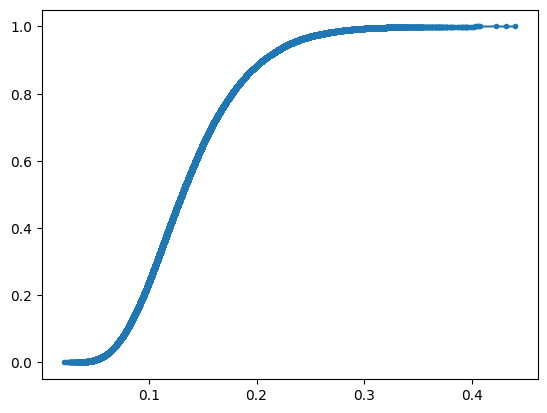

In [145]:
plt.plot(x1, y1, linestyle = None, marker = '.')

In [153]:
result_dict = (ucf_rax.groupby('Index')
 .DTXSID
 .apply(list)
 .to_dict()
)


 

In [160]:

embeddings_dict = {}

for index, dtxsid_list in result_dict.items():
    # Filter the list to include only DTXSIDs present in the DataFrame index
    valid_dtxsids = [dtxsid for dtxsid in dtxsid_list if dtxsid in rax_embeddings_df.index]
    if valid_dtxsids:  # Proceed only if there are valid DTXSIDs
        embeddings_dict[index] = rax_embeddings_df.loc[valid_dtxsids]

In [164]:
def distance_matrix(df):
    '''
    Function to create a pairwise square distance matrix using the Jaccard index
    '''
    D_mgrn = pd.DataFrame(squareform(pdist(df, 'cosine')), columns = df.index, index = df.index)

    return D_mgrn

In [166]:
Dc_dict = {}
for k, v in embeddings_dict.items():
    Dc_dict[k] = distance_matrix(v)
    

In [169]:
def calculate_statistics(distance_matrix):
    mean_distance = np.mean(distance_matrix)
    median_distance = np.median(distance_matrix)
    std_distance = np.std(distance_matrix)
    max_distance = np.max(distance_matrix)
    return mean_distance, median_distance, std_distance, max_distance


In [171]:
entire_stats = calculate_statistics(squareform(Dcr))
print("Entire Dataset Statistics:", entire_stats)

Entire Dataset Statistics: (0.1379276124696726, 0.1305919518289858, 0.05050415358678195, 0.4405371354238282)


In [188]:
# Calculate for each subset

subset_stats = [calculate_statistics(squareform(v)) for  v in Dc_dict.values()]
#print("Subset Statistics:", subset_stats)


In [204]:
from scipy.stats import ttest_ind, mannwhitneyu

# T-tests
ttest_results = [ttest_ind(squareform(Dcr), squareform(v)) for v in Dc_dict.values()]
#print("T-test Results:", ttest_results)

# Mann-Whitney U Tests
mannwhitney_results = [mannwhitneyu(squareform(Dcr), squareform(v)) for v in Dc_dict.values()]
#print("Mann-Whitney U Test Results:", mannwhitney_results)

In [205]:
squareform(Dcr).max()

0.4405371354238282

In [221]:
def permutation_test(subset, overall, num_permutations=1000):
    # Calculate observed difference in means
    observed_diff = np.max(subset) - np.max(overall)
    
    # Combine data
    combined = np.concatenate([subset, overall])
    n = len(subset)
    
    # Permutation test
    perm_diffs = []
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        perm_subset = combined[:n]
        perm_overall = combined[n:]
        perm_diff = np.max(perm_subset) - np.max(perm_overall)
        perm_diffs.append(perm_diff)
    
    # Calculate p-value
    perm_diffs = np.array(perm_diffs)
    p_value = np.sum(np.abs(perm_diffs) >= np.abs(observed_diff)) / num_permutations
    
    return observed_diff, p_value

In [222]:
perm = []
for k, v  in Dc_dict.items():
    observed_diff, p_value = permutation_test(squareform(v), squareform(Dcr))
    perm.append([k, observed_diff, p_value])

In [225]:
(pd.DataFrame(perm, columns = ['Index', 'Obs_diff', 'p'])
 .query('p < 0.05')
 .count()
)

Index       26
Obs_diff    26
p           26
dtype: int64

In [227]:
1-(26/81)

0.6790123456790124

In [110]:
import seaborn as sns

<Axes: >

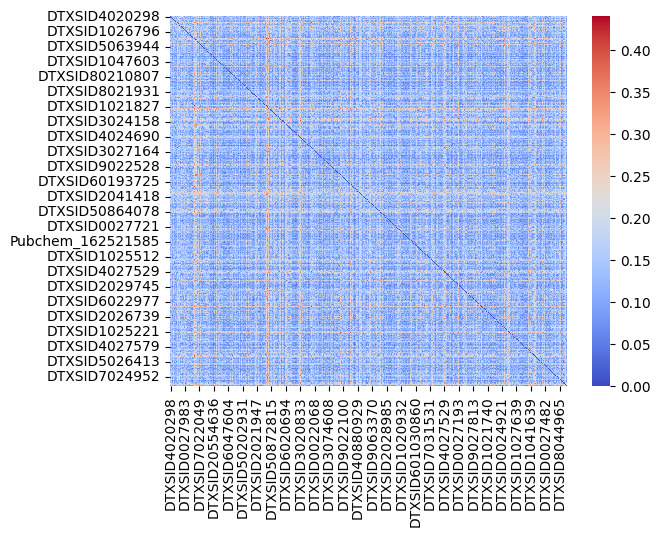

In [114]:
sns.heatmap(Dcr, cmap = 'coolwarm')

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [83]:
df.outcome.value_counts(normalize = True)

outcome
0    0.672959
1    0.327041
Name: proportion, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split

In [98]:
df1 = df.set_index('DTXSID')
y = df1['outcome']

In [93]:
X = df[['DTXSID','SMILES']]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [100]:
X_train_dict = {k:v for k,v in zip(X_train['DTXSID'], X_train['SMILES'])}
X_test_dict = {k:v for k,v in zip(X_test['DTXSID'], X_test['SMILES'])}

In [131]:
graph_train = {}
errors = []
for k, v in X_train_dict.items():
    try:
        a = smile_to_mol_graph(Chem.MolFromSmiles(v))
    except Exception as error:
        errors.append(error)
    finally:
        graph_train[k] = a

In [132]:
graph_test = {}
errors = []
for k, v in X_test_dict.items():
    try:
        a = smile_to_mol_graph(Chem.MolFromSmiles(v))
    except Exception as error:
       errors.append(error)
    finally:
        graph_test[k] = a

In [103]:
# Define the pipeline
pipeline = Pipeline([
    ('node2vec', Node2VecEmbedding()),
    ('classifier', RandomForestClassifier())
])

In [104]:
# Define the parameter grid
param_grid = {
    'node2vec__p': [0.25, 0.5, 1, 2, 4],
    'node2vec__q': [0.25, 0.5, 1, 2, 4],
    'classifier__n_estimators': [100, 200]
}

In [109]:
from sklearn.metrics import roc_auc_score,make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, train_test_split

In [108]:
cv = StratifiedKFold(n_splits = 10)

In [110]:
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, verbose=2, n_jobs=-1)

In [134]:
len(graph_train)

4322

In [138]:
list(graph_train.keys())[0:5]

['DTXSID4060991',
 'DTXSID50884731',
 'DTXSID3046584',
 'DTXSID4027319',
 'DTXSID8059427']

In [140]:
#y_train

In [ ]:
cv_results = cross_validate(grid_search, list(graph_train.values()), y_train, cv=cv, scoring = make_scorer(roc_auc_score), n_jobs=-1,return_estimator=True) 

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits


Computing transition probabilities:   0%|          | 0/24 [00:00<?, ?it/s]

Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 14250.18it/s]


Generating walks (CPU: 1):   0%|          | 0/50 [00:00<?, ?it/s]


Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 13667.79it/s]



Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 940.59it/s]

Generating walks (CPU: 1):   0%|          | 0/50 [00:00<?, ?it/s]?, ?it/s]

Computing transition probabilities:   0%|          | 0/24 [00:00<?, ?it/s]


Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 15558.47it/s]

Computing transition probabilities:   0%|          | 0/24 [00:00<?, ?it/s]







Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 13969.37it/s]

Generating walks (CPU: 1):   0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 14432.01it/s]


Generating walks (CPU: 1

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits




Computing transition probabilities:   0%|          | 0/24 [00:00<?, ?it/s]

Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 115.80it/s]







Generating walks (CPU: 1):   0%|          | 0/50 [00:00<?, ?it/s]


Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 15548.86it/s]



Generating walks (CPU: 1):   0%|          | 0/50 [00:00<?, ?it/s]





Generating walks (CPU: 1):  24%|██▍       | 12/50 [00:00<00:00, 44.78it/s]









Generating walks (CPU: 1):  22%|██▏       | 11/50 [00:00<00:00, 41.02it/s]

Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 16475.17it/s]


Generating walks (CPU: 1):   0%|          | 0/50 [00:00<?, ?it/s]








Generating walks (CPU: 1):  14%|█▍        | 7/50 [00:00<00:00, 53.88it/s]






Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 492.71it/s]A






Computing transition probabilities: 100%|██████████| 24/24 [00:00<00:00, 529.83it/s][A

Computing transiti

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Generating walks (CPU: 1):  18%|█▊        | 9/50 [00:00<00:01, 25.69it/s]

















Generating walks (CPU: 1):  10%|█         | 5/50 [00:00<00:01, 26.82it/s]



Generating walks (CPU: 1):  14%|█▍        | 7/50 [00:00<00:00, 61.39it/s]


Generating walks (CPU: 1):  48%|████▊     | 24/50 [00:00<00:00, 46.40it/s] A


Generating walks (CPU: 1):  12%|█▏        | 6/50 [00:00<00:00, 48.35it/s]

Generating walks (CPU: 1):   6%|▌         | 3/50 [00:00<00:01, 27.94it/s]



Generating walks (CPU: 1):  24%|██▍       | 12/50 [00:00<00:01, 33.34it/s]








Generating walks (CPU: 1):  34%|███▍      | 17/50 [00:00<00:00, 34.69it/s]






Generating walks (CPU: 1):  14%|█▍        | 7/50 [00:00<00:00, 69.62it/s]





Generating walks (CPU: 1):   6%|▌         | 3/50 [00:00<00:03, 13.71it/s]

Generating walks (CPU: 1):  38%|███▊      | 19/50 [00:00<00:00, 38.70it/s]

Generating walks (CPU: 1):  44%|████▍     | 22/50 [00:00<00:00, 39.07it/s]

Generating walks (CPU: 1):  24%|██▍       | 12/50 [00:0